<a href="https://colab.research.google.com/github/NNchowdary26/Complete-Python/blob/main/Diamond%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [82]:
diamond_df = pd.read_csv("/content/diamonds.csv")
diamond_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [83]:
diamond_df.shape

(53940, 11)

In [88]:
diamond_df = diamond_df.drop(columns=["Unnamed: 0"])

In [89]:
diamond_df.shape

(53940, 10)

In [90]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [91]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [93]:
diamond_df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [95]:
diamond_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [97]:
# Define a function to find outliers using the IQR method
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify numeric columns
numeric_columns = diamond_df.select_dtypes(include=['float64', 'int64']).columns

# Find outliers for each numeric column
outliers_summary = {col: find_outliers_iqr(diamond_df, col) for col in numeric_columns}

# Summary of outliers count per column
outliers_count = {col: len(outliers) for col, outliers in outliers_summary.items()}
outliers_count


{'carat': 1889,
 'depth': 2545,
 'table': 605,
 'price': 3540,
 'x': 32,
 'y': 29,
 'z': 49}

In [98]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numeric columns
scaler = MinMaxScaler()
normalized_data = diamond_df.copy()
normalized_data[numeric_columns] = scaler.fit_transform(diamond_df[numeric_columns])

# Display the first few rows of normalized data
normalized_data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.006237,Ideal,E,SI2,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.002079,Premium,E,SI1,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.006237,Good,E,VS1,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.018711,Premium,I,VS2,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.022869,Good,J,SI2,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478


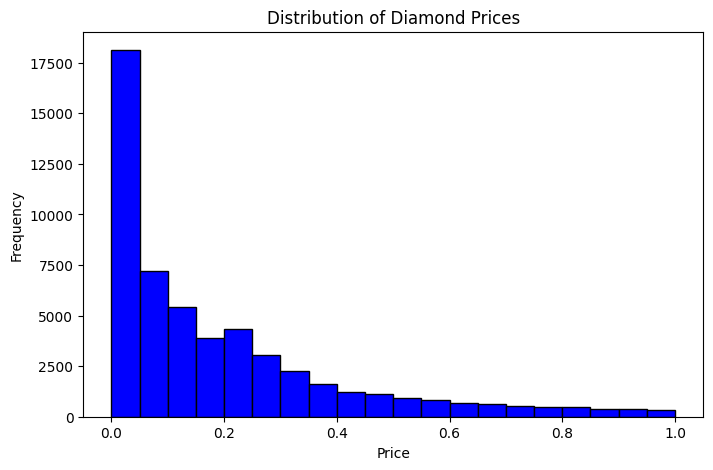

In [99]:
# Overall distribution of diamond prices in the dataset
plt.figure(figsize=(8,5))
plt.hist(normalized_data['price'], bins=20, color='b', edgecolor='k');
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Prices')
plt.show()

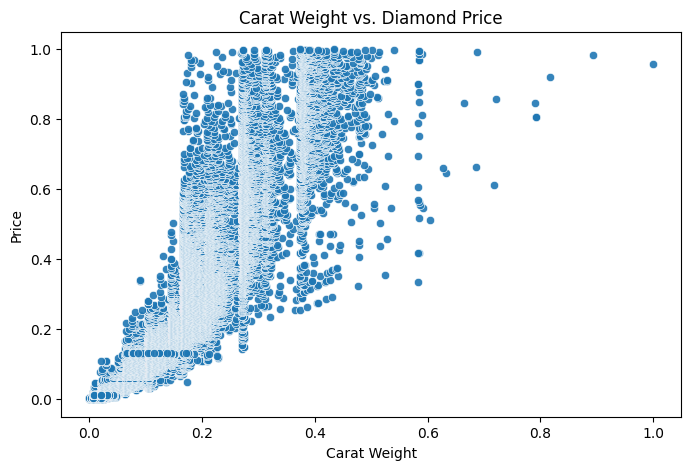

In [100]:
# How does carat weight relate to the price of diamonds?
plt.figure(figsize=(8,5))
sns.scatterplot(x='carat', y='price', data=normalized_data, alpha=0.9)
plt.xlabel('Carat Weight')
plt.ylabel('Price')
plt.title('Carat Weight vs. Diamond Price')
plt.show()

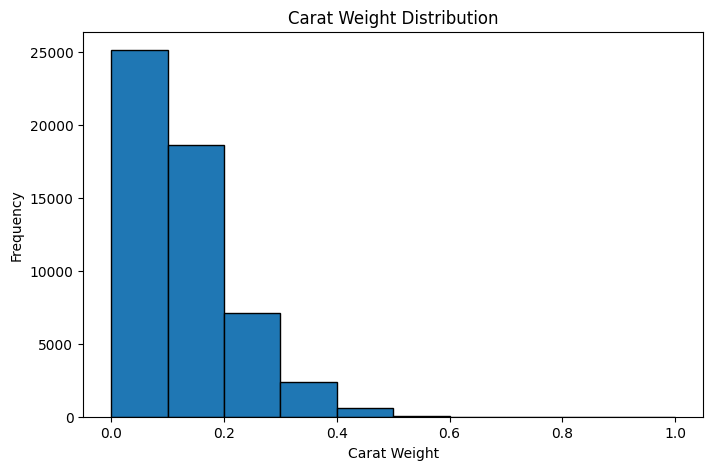

In [101]:
plt.figure(figsize=(8, 5))
plt.hist(normalized_data['carat'], bins=10, edgecolor='k')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Carat Weight Distribution')
plt.show()

In [102]:
# How does the cut quality affect the diamond prices?
cut_quality_prices = normalized_data.groupby('cut')['price'].mean()
cut_quality_prices

,price
cut,
Fair,0.218022
Good,0.194781
Ideal,0.169300
Premium,0.230213
Very Good,0.197641


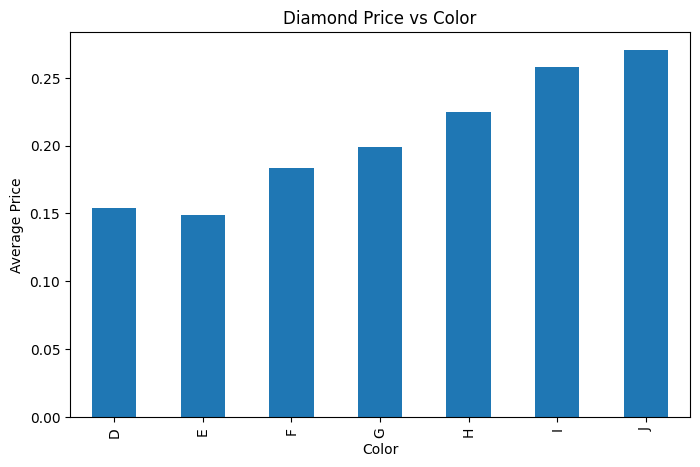

In [103]:
# Relationship between diamond color and their prices
color_prices = normalized_data.groupby('color')['price'].mean()

plt.figure(figsize=(8,5))
color_prices.plot(kind='bar')
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.title('Diamond Price vs Color')
plt.show()

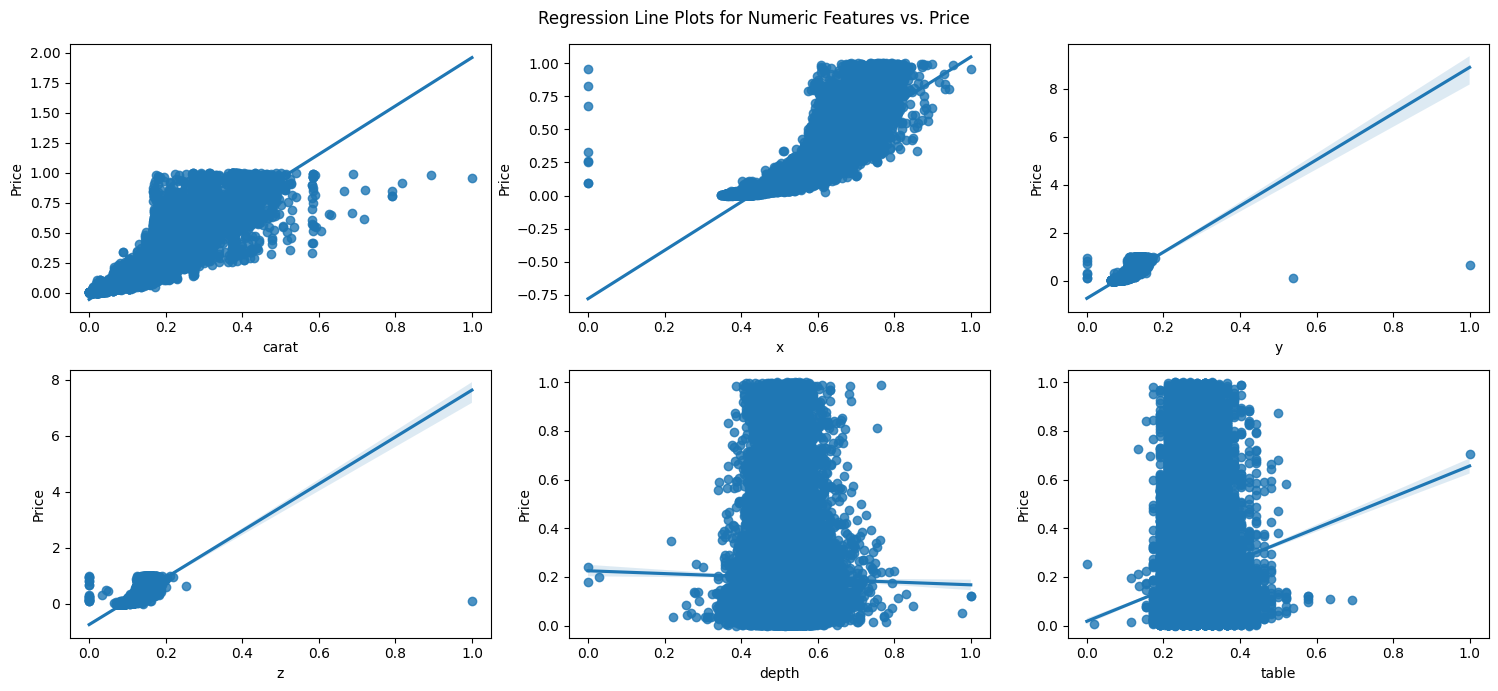

In [104]:
# Regression line plot

numeric_features = ['carat', 'x', 'y', 'z', 'depth', 'table']

fig, ax = plt.subplots(2, 3, figsize=(15,7))
fig.suptitle('Regression Line Plots for Numeric Features vs. Price')

for i, feature in enumerate(numeric_features):
    row, col = divmod(i, 3)
    sns.regplot(x=feature, y='price', data=normalized_data, ax=ax[row, col])
    ax[row, col].set_xlabel(feature)
    ax[row, col].set_ylabel('Price')

plt.tight_layout()
plt.show()

In [105]:
# Split data
X = normalized_data.drop(['price'], axis=1)
y = normalized_data['price']

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape)

(43152, 9) (10788, 9)


In [107]:
label_encoder = LabelEncoder()

X_train['cut'] = label_encoder.fit_transform(X_train['cut'])
X_test['cut'] = label_encoder.transform(X_test['cut'])

X_train['color'] = label_encoder.fit_transform(X_train['color'])
X_test['color'] = label_encoder.transform(X_test['color'])

X_train['clarity'] = label_encoder.fit_transform(X_train['clarity'])
X_test['clarity'] = label_encoder.transform(X_test['clarity'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [109]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

Mean Squared Error: 0.01
Mean Absolute Error: 0.05
Root Mean Squared Error: 0.07
R2 Score: 0.89


 In this case, 0.01 indicates that on average, the squared errors are quite small, suggesting your model is fitting the data reasonably well.

MAE measures the average of the absolute differences between the predicted and actual values. It tells you the average size of the errors in the same units as the target variable (price, in your case). A smaller MAE means better accuracy. Here, 0.05 indicates that the model's predictions are, on average, off by $0.05 (or whatever unit your data is in), which is relatively small.

RMSE is the square root of the MSE, and it gives a sense of the error in the same units as the target variable. It’s sensitive to large errors. With an RMSE of 0.07, your model has small prediction errors, though it's slightly more sensitive to outliers than the MAE.

R² represents the proportion of variance in the target variable (price) that is explained by the model. It ranges from 0 to 1, where 1 means a perfect fit. An R² score of 0.89 means your model explains 89% of the variance in diamond prices, which is quite good. This indicates a strong relationship between the features and the target variable.

In [110]:
# Ridge regression
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [0.01, 0.1, 1.0, 10.0]}
grid_search = GridSearchCV(estimator = ridge, param_grid = parameters, cv = 5)
grid_search.fit(X_train, y_train)
print('The best Alpha value:', grid_search.best_params_)

The best Alpha value: {'alpha': 0.1}


In [111]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)
print('Coefficient of determination :', r2_score(y_test, ridge.predict(X_test)))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

Coefficient of determination : 0.8870401754811512
Root mean squared error: 0.07234330755821441


The R² value from Ridge regression (0.887) is very similar to the linear regression result (0.89), suggesting that Ridge regression isn't significantly changing the model's ability to explain the variance.

The RMSE from Ridge regression (0.0723) is very close to that of the linear regression (0.07), indicating similar prediction accuracy between the two models.

In [113]:
# Decision Tree Model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

Mean Squared Error: 0.00
Mean Absolute Error: 0.02
Root Mean Squared Error: 0.04
R2 Score: 0.97


The MSE of 0.00 suggests that the model is making extremely accurate predictions, as the squared error between the predicted and actual values is practically zero. This typically means that the model is fitting the data very closely, with almost no error.

The MAE of 0.02 indicates that the average absolute difference between the predicted and actual values is just 0.02 units (likely dollars or the unit of your target). This is a very small error, showing high accuracy in your predictions.

The RMSE of 0.04 shows the model's average error, taking larger errors into account. Given that the value is very small, it suggests that the Decision Tree is providing accurate predictions with minimal error.

The R² value of 0.97 is excellent, meaning that 97% of the variance in the target variable (diamond price) is explained by the model. This is very high and suggests that your Decision Tree is a great fit for the data, explaining almost all of the variability in the target.

In [115]:
import xgboost as xgb
# XG Boost
xgb_model = xgb.XGBRFRegressor(objective='reg:squarederror', random_state=1)
xgb_model.fit(X_train_scaled, y_train)
#Make predictions on the test dataset
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

Mean Squared Error: 0.00
Mean Absolute Error: 0.03
Root Mean Squared Error: 0.05
R2 Score: 0.95


In [117]:
# DNN
import tensorflow as tf
from tensorflow import keras
output_size=1
hidden_layer=3
input_size=1
learning_rate=0.01
loss_function='mean_squared_error'
epochs=50
batch_size=10
model = keras.Sequential()
model.add(keras.layers.Dense(hidden_layer, activation = 'relu'))
model.add(keras.layers.Dense(output_size))
model.compile(keras.optimizers.Adam(learning_rate = learning_rate), loss_function)

In [119]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size,
                    verbose = False, validation_split = 0.3)

In [120]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.grid(True)

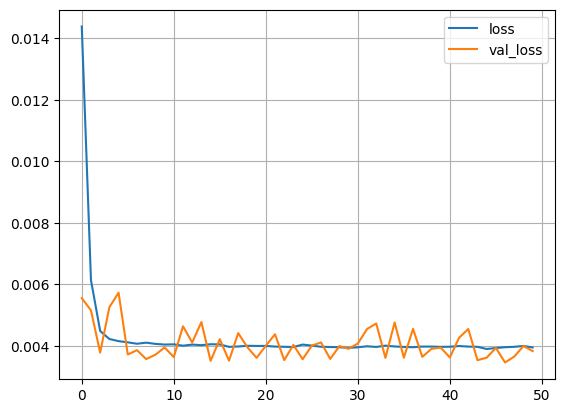

In [121]:
plot_loss(history)

In [124]:
y_pred = model.predict(X_test)
print('Coefficient of determination: ', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Coefficient of determination:  0.9169910154994994
RMSE: 0.06201530827380539


The NN model performed significantly better than both Linear regression model and Ridge regression, with RMSE of 620 and Coefficient of determination value of 0.97 meaning the NN model was able to explain 97% of the variability in the test data

In [125]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, activation = 'relu'))
model.add(keras.layers.Dense(output_size))
model.compile(keras.optimizers.Adam(learning_rate = learning_rate), loss_function)

In [126]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size,
                    verbose = False, validation_split = 0.3)

338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Coefficient of determination:  0.938713267189382
RMSE: 0.05328679395404162


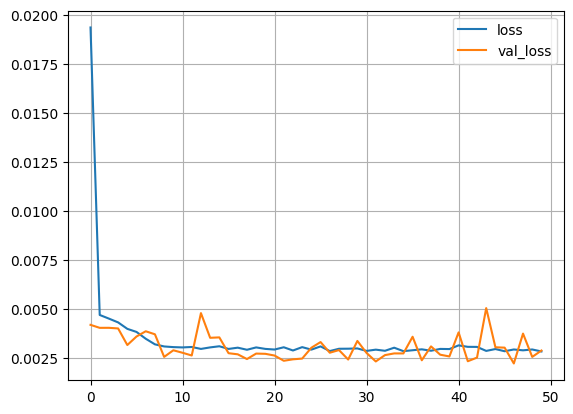

In [127]:
plot_loss(history)
y_pred = model.predict(X_test)
print('Coefficient of determination: ', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Changing the number of hidden layers to 10 slightly improved the model performance of the model